# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'794767f25cd9a02748edac688c519384'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print(cities)

['hermanus', 'kralendijk', 'tera', 'dikson', 'sorvag', 'mataura', 'puerto ayora', 'albany', 'fairbanks', 'kapaa', 'vardo', 'nome', 'arraial do cabo', 'phalodi', 'verkhoyansk', 'upernavik', 'barrow', 'marcona', 'ribeira grande', 'saint-philippe', 'tasiilaq', 'hofn', 'lorengau', 'dingle', 'atuona', 'bogande', 'busselton', 'saleaula', 'rikitea', 'sola', 'halalo', 'touros', 'anadyr', 'daru', 'lagos', 'manzil salim', 'hobart', 'belushya guba', 'bethel', 'luderitz', 'sinnamary', 'punta arenas', 'ambunti', 'ponta do sol', 'hambantota', 'toliary', 'hithadhoo', 'praxedis guerrero', 'bulembu', 'bambous virieux', 'san patricio', 'santa cruz', 'severo-kurilsk', 'new norfolk', 'castro', 'kodiak', 'ushuaia', 'jamestown', 'voh', 'coihaique', 'klaksvik', 'victoria', 'leopold', 'vagur', 'boden', 'jati', 'galveston', 'frontera', 'okhotsk', 'san cristobal', 'akyab', 'narsaq', 'chokurdakh', 'kaitangata', 'hilo', 'kalengwa', 'vao', 'taquara', 'lokosovo', 'kutum', 'takapau', 'maneadero', 'burnie', 'houma', 

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url2 = url + "&q=" + cities[0]

response = requests.get(url2).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": -34.4187,
        "lon": 19.2345
    },
    "dt": 1615350071,
    "id": 3366880,
    "main": {
        "feels_like": 72.9,
        "humidity": 74,
        "pressure": 1002,
        "temp": 73,
        "temp_max": 73,
        "temp_min": 73
    },
    "name": "Hermanus",
    "rain": {
        "1h": 0.16
    },
    "sys": {
        "country": "ZA",
        "id": 2006131,
        "sunrise": 1615351097,
        "sunset": 1615396116,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 314,
        "gust": 21,
        "speed": 8.99
    }
}


In [6]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'rain', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [7]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# url2 = url + "&q=" + cities[0]

# response = requests.get(url2).json()
# print(json.dumps(response, indent=4, sort_keys=True))

list = []

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        url2 = url + "&q=" + city
        response = requests.get(url2).json()
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temperature = response["main"]["temp_max"]
        cloudiness = response["clouds"]["all"]
        humidity = response["main"]["humidity"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        dictionary = {"City Name" : city,
                      "Latitude" : latitude,
                      "Longitude" : longitude,
                      "Temperature" : temperature,
                      "Cloudiness" : cloudiness,
                      "Humidity" : humidity,
                      "Wind Speed" : wind,
                      "Country": country
                     }
    
        list.append(dictionary)
    except:
        print(city)


sorvag
marcona
saleaula
halalo
belushya guba
toliary
barentsburg
illoqqortoormiut
cam pha
tabiauea
tumannyy
lolua
temaraia
ust-kamchatsk
jarjis
taolanaro
kavant
yomitan
grand river south east
tuggurt
amderma
nizhneyansk
karamea
stoyba
kuche
sentyabrskiy
stamsund
sumbawa
vaitupu
kazalinsk
umzimvubu
tsihombe
andevoranto
attawapiskat
tidore
umm durman
wahran
mys shmidta
yirol
anar darreh
warqla
cockburn harbour
mocambique
palabuhanratu
phan rang
cape elizabeth
agha jari
ambodifototra
haapu
tapaua
puerto pinasco
bolshiye kolpany
tabukiniberu
samusu
nguiu
phnum penh
solovetskiy
chagda


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame(list)
weather_df.count()
weather_df.head()

,City Name,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed,Country
0,hermanus,-34.4187,19.2345,73.00,83,74,8.99,ZA
1,kralendijk,12.1500,-68.2667,77.00,20,78,8.05,BQ
2,tera,14.0078,0.7531,80.20,24,16,5.64,NE
3,dikson,73.5069,80.5464,-22.32,100,88,8.97,RU
4,mataura,-46.1927,168.8643,55.99,93,79,11.01,NZ


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_df.describe()

,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
count,585.000000,585.000000,585.000000,585.000000,585.00000,585.000000
mean,18.594154,19.151679,55.116342,49.709402,70.91453,7.957675
std,33.262484,92.636965,28.319366,39.160991,21.15038,6.125145
min,-54.800000,-179.166700,-30.930000,0.000000,1.00000,0.430000
25%,-8.145000,-62.996700,39.200000,3.000000,59.00000,3.440000
50%,21.444700,21.376000,64.060000,46.000000,76.00000,6.260000
75%,45.020500,102.817000,76.170000,90.000000,88.00000,10.360000
max,78.218600,179.316700,102.200000,100.000000,100.00000,45.430000


In [28]:
#  Get the indices of cities that have humidity over 100%.
weather_df_2 = weather_df[(weather_df["Humidity"]>100)].index
weather_df_2

Int64Index([], dtype='int64')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather = weather_df.drop(weather_df_2,inplace=False)
weather.describe()

,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
count,585.000000,585.000000,585.000000,585.000000,585.00000,585.000000
mean,18.594154,19.151679,55.116342,49.709402,70.91453,7.957675
std,33.262484,92.636965,28.319366,39.160991,21.15038,6.125145
min,-54.800000,-179.166700,-30.930000,0.000000,1.00000,0.430000
25%,-8.145000,-62.996700,39.200000,3.000000,59.00000,3.440000
50%,21.444700,21.376000,64.060000,46.000000,76.00000,6.260000
75%,45.020500,102.817000,76.170000,90.000000,88.00000,10.360000
max,78.218600,179.316700,102.200000,100.000000,100.00000,45.430000


In [31]:
lat = weather["Latitude"]
maxtemp = weather["Temperature"]
humid = weather["Humidity"]
cloud = weather["Cloudiness"]
windspeed = weather["Wind Speed"]


In [32]:
weather.to_csv("output_data\cities.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

## Latitude vs. Temperature Plot

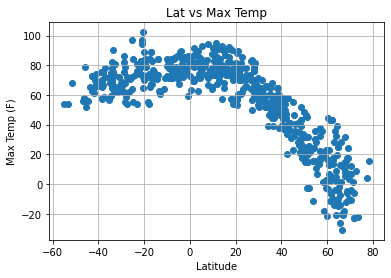

In [43]:
plt.scatter(lat, maxtemp)
plt.title("Lat vs Max Temp")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

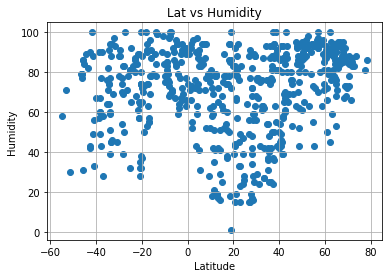

In [44]:
plt.scatter(lat, humid)
plt.title("Lat vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

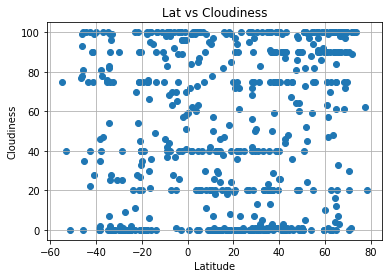

In [45]:
plt.scatter(lat, cloud)
plt.title("Lat vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

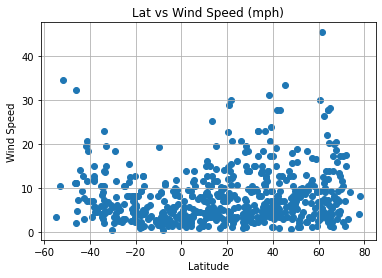

In [46]:
plt.scatter(lat, windspeed)
plt.title("Lat vs Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [48]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"R: {rvalue**2}")
    plt.show()

In [56]:
north = weather_df.loc[(weather_df["Latitude"] >= 0)]
south = weather_df.loc[(weather_df["Latitude"] < 0)]


,City Name,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed,Country
1,kralendijk,12.1500,-68.2667,77.00,20,78,8.05,BQ
2,tera,14.0078,0.7531,80.20,24,16,5.64,NE
3,dikson,73.5069,80.5464,-22.32,100,88,8.97,RU
6,albany,42.6001,-73.9662,36.00,44,61,3.71,US
7,fairbanks,64.8378,-147.7164,25.00,75,68,1.36,US


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R: 0.8170426437422962


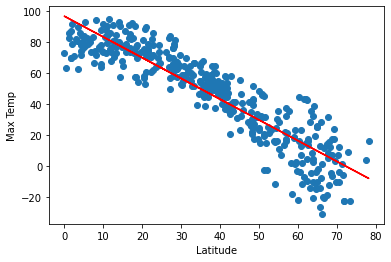

ANALYSIS: These variables are negatively correlated!


In [73]:
x_values = north["Latitude"]
y_values = north["Temperature"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))
print("ANALYSIS: These variables are negatively correlated!")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R: 0.2540392714344355


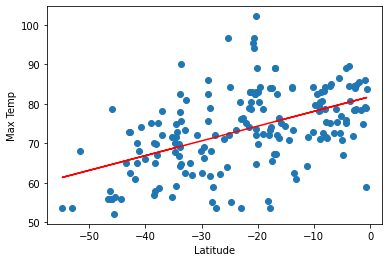

ANALYSIS: These variables are slightly not correlated!


In [74]:
x_values = south["Latitude"]
y_values = south["Temperature"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))
print("ANALYSIS: These variables are slightly not correlated!")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R: 0.1324407073957025


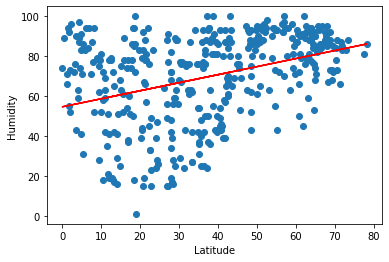

ANALYSIS: These variables are not correlated!


In [75]:
x_values = north["Latitude"]
y_values = north["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,30))
print("ANALYSIS: These variables are not correlated!")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R: 0.08454848715323283


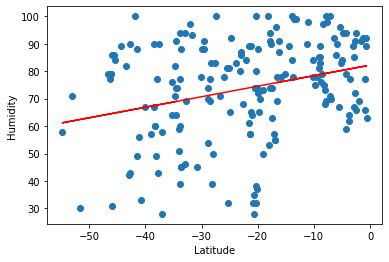

ANALYSIS: These variables are not correlated!


In [76]:
x_values = south["Latitude"]
y_values = south["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,30))
print("ANALYSIS: These variables are not correlated!")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R: 0.06337483396892886


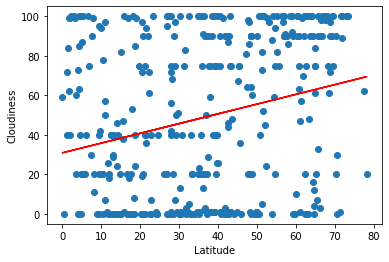

ANALYSIS: These variables are not correlated!


In [77]:
x_values = north["Latitude"]
y_values = north["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,30))
print("ANALYSIS: These variables are not correlated!")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R: 0.025559734321353254


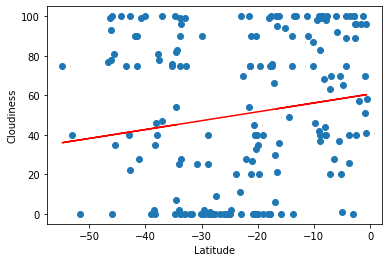

ANALYSIS: These variables are not correlated!


In [78]:
x_values = south["Latitude"]
y_values = south["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,30))
print("ANALYSIS: These variables are not correlated!")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R: 0.01789790954871005


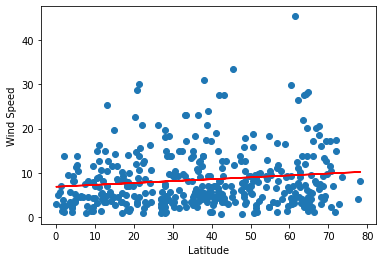

ANALYSIS: These variables are not correlated!


In [82]:
x_values = north["Latitude"]
y_values = north["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,30))
print("ANALYSIS: These variables are not correlated!")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R: 0.15569223427966533


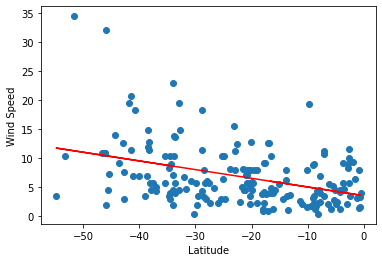

ANALYSIS: These variables are not correlated!


In [83]:
x_values = south["Latitude"]
y_values = south["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,30))
print("ANALYSIS: These variables are not correlated!")